Árboles de Decisión

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset del Titanic
titanic_data = pd.read_csv('Titanic.csv')

In [3]:
# Eliminar columnas irrelevantes o con muchos valores faltantes
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [4]:
# Manejar los valores faltantes
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [5]:
# Convertir variables categóricas en variables dummy
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [6]:
# Separar features y target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [7]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
# Evaluar el modelo
train_score = tree_model.score(X_train, y_train)
test_score = tree_model.score(X_test, y_test)

print(f'Precisión en el conjunto de entrenamiento: {train_score}')
print(f'Precisión en el conjunto de prueba: {test_score}')


Precisión en el conjunto de entrenamiento: 0.8342696629213483
Precisión en el conjunto de prueba: 0.7988826815642458


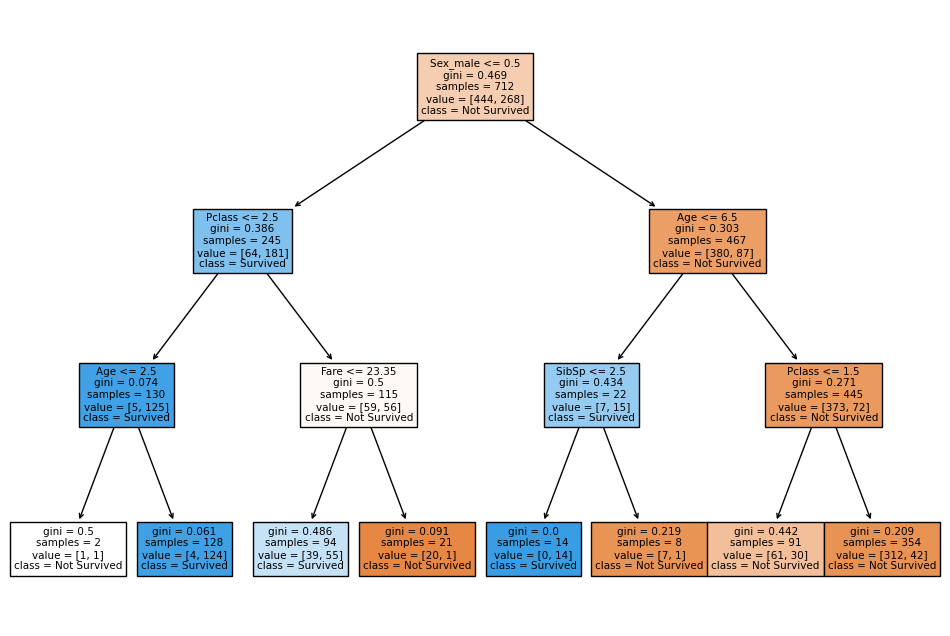

In [10]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.savefig('decision_tree.png')  # Guardar el árbol como una imagen
plt.show()

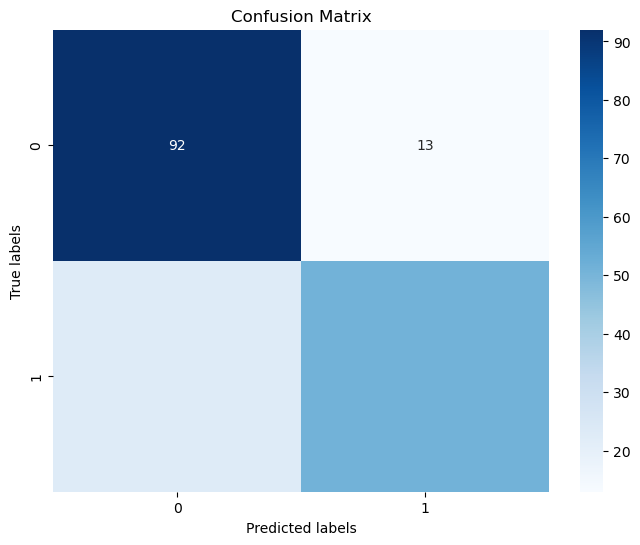

In [11]:
# Crear mapa de calor para matriz de confusión
y_pred = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

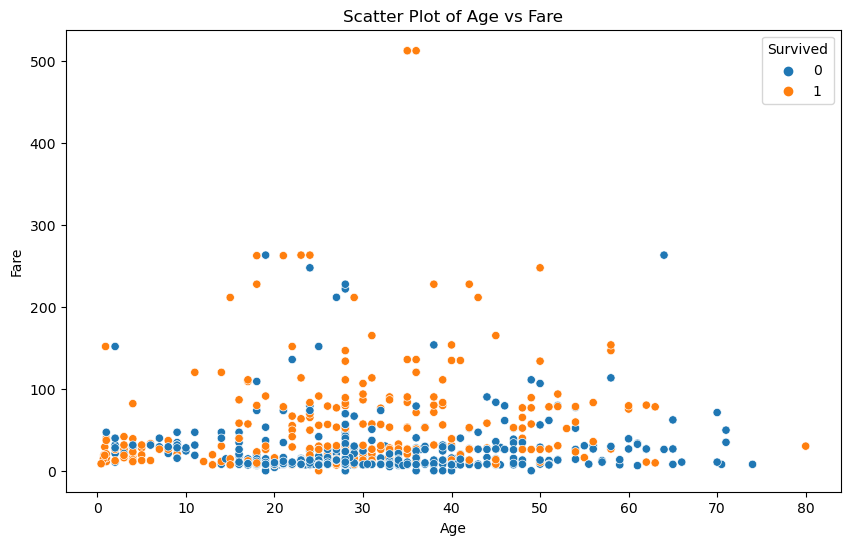

In [12]:
# Crear gráfico de dispersión para visualizar la relación entre las variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()